<a href="https://colab.research.google.com/github/Alkirk92/Opportunity-Work_Challenge/blob/main/2024_07_15_O_W_Research_Analyst_Andrea_Kirk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview

The goal of this assignment is to understand the characteristics of STARs in Florida.

##Questions to Answer
*   What percent of all workers in Florida are STARs and how does that vary by race?
*   What are the five largest occupations in Florida?
*   How do these five occupations vary by
      1.   the share of STARs in the occupation; and
      2. the average wages of the occupation?
*   Is there any relationship between an occupation’s wages and the share of STARs in the role?
*   If time allows, are there any other takeaways that you noticed from looking at the data that you’d like to comment on?

#Load libraries and access data

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import BoundaryNorm, ListedColormap
import io
import itertools
import os
from pandas.core.reshape.pivot import pivot_table
from sqlalchemy.util import ordered_column_set
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import LogLocator
from matplotlib.ticker import FixedLocator
import matplotlib.ticker as ticker
import math
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import ipywidgets as widgets
from scipy import stats
from scipy.stats import chi2
from matplotlib.patches import Rectangle
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import linregress
from scipy.stats import shapiro
from scipy.stats import ttest_ind

In [4]:
#see all columns when viewing data tables
pd.set_option('display.max_columns', None)
#see all rows
#pd.set_option('display.max_rows', None)

In [5]:
#mount googledrive to access folder containing data files
from google.colab import drive
drive.mount('/content/drive')

#os.lis`enter code here`tdir(file_path)
def myfunction(data):
  print(data)
file_path = 'drive/MyDrive/colab_files/Opportunity_at_Work'

for file in os.listdir(file_path):
  if file.endswith(".csv"):
    myfunction(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Florida Workers.csv


In [6]:
#make main data frame from data files in csv
FL_workers = pd.read_csv('drive/MyDrive/colab_files/Opportunity_at_Work/Florida Workers.csv', encoding='ISO-8859-1')

display(FL_workers.head(), FL_workers.tail(), FL_workers.sample(5))

,statefip,metro,met2013,perwt,sex,age,race,hispan,educd,empstat,classwkrd,occ,ind,wkswork1,uhrswork,incearn,occ_label,ind_label
0,12,2,27260,0.097,2,26,1,0,63,1,25,3645,9690,52,40,34500,Medical assistants,U. S. Navy
1,12,4,36740,0.016,1,33,1,0,71,1,22,4251,7770,52,30,15000,Landscaping and groundskeeping workers,Landscaping services
2,12,4,0,0.140,1,30,1,0,30,1,22,6260,770,52,40,20800,Construction laborers,Construction (the cleaning of buildings and dw...
3,12,3,45300,0.092,1,37,8,1,2,1,22,6050,290,52,8,18000,Other agricultural workers,Support activities for agriculture and forestry
4,12,2,27260,0.030,1,35,2,0,65,1,22,9620,7580,26,30,10400,"Laborers and freight, stock, and material move...",Employment services


,statefip,metro,met2013,perwt,sex,age,race,hispan,educd,empstat,classwkrd,occ,ind,wkswork1,uhrswork,incearn,occ_label,ind_label
83758,12,4,19660,0.240,2,55,1,0,65,1,22,3640,7980,52,40,44200,Dental assistants,Offices of dentists
83759,12,4,19660,0.273,2,25,1,0,65,1,22,4530,7380,52,40,23800,"Baggage porters, bellhops, and concierges",Computer systems design and related services
83760,12,3,33100,0.069,1,48,8,2,63,1,22,9620,7790,52,40,60000,"Laborers and freight, stock, and material move...",Waste management and remediation services
83761,12,3,33100,0.059,2,47,1,2,101,1,22,1050,7380,52,40,60000,Computer support specialists,Computer systems design and related services
83762,12,3,33100,0.155,1,40,1,0,71,1,22,4251,7770,52,40,34300,Landscaping and groundskeeping workers,Landscaping services


,statefip,metro,met2013,perwt,sex,age,race,hispan,educd,empstat,classwkrd,occ,ind,wkswork1,uhrswork,incearn,occ_label,ind_label
10707,12,4,38940,0.023,1,32,1,4,64,2,22,7720,3680,12,40,6000,"Electrical, electronics, and electromechanical...",Ship and boat building
39773,12,3,45300,0.109,2,28,1,0,101,1,22,5740,5593,52,45,44100,"Secretaries and administrative assistants, exc...",Electronic shopping and mail-order houses
18409,12,4,45300,0.231,1,50,1,0,101,1,22,440,7380,52,40,60000,Other managers,Computer systems design and related services
52988,12,3,27260,0.166,1,48,2,0,71,1,14,440,7780,40,40,73000,Other managers,Other administrative and other support services
25464,12,3,33100,0.313,2,63,8,4,63,1,22,120,6870,52,40,43000,Financial managers,Banking and related activities


In [8]:
df = FL_workers

# Check for NaN values in the entire DataFrame
print(df.isna().sum())

# Alternatively, use .info() for a concise summary
print(df.info())

statefip       0
metro          0
met2013        0
perwt          0
sex            0
age            0
race           0
hispan         0
educd          0
empstat        0
classwkrd      0
occ            0
ind            0
wkswork1       0
uhrswork       0
incearn        0
occ_label    383
ind_label      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83763 entries, 0 to 83762
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   statefip   83763 non-null  int64  
 1   metro      83763 non-null  int64  
 2   met2013    83763 non-null  int64  
 3   perwt      83763 non-null  float64
 4   sex        83763 non-null  int64  
 5   age        83763 non-null  int64  
 6   race       83763 non-null  int64  
 7   hispan     83763 non-null  int64  
 8   educd      83763 non-null  int64  
 9   empstat    83763 non-null  int64  
 10  classwkrd  83763 non-null  int64  
 11  occ        83763 non-null  int64  
 12  ind    

#View weighted population with PERWT, from HINT

In [23]:
# Use the perwt column to determine the weighted STARs
df = FL_workers.copy()

#All workers
# Calculate weighted total workers from survey
weighted_total = (df['perwt'] * 1000).sum()  # Multiply by 1000 to interpret in thousands


#STARs
# Filter for STARs (workers with educd in range 63 to 81) and create new column labeled STAR where 1 = STAR and 0 = nonSTAR
df['STAR'] = df['educd'].between(63, 81).astype(int)

# Sum of STARs weighted by perwt
weighted_STARs = (df['STAR'] * df['perwt'] * 1000).sum()


##Bachelors or higher
# Filter for bachelors or higher workers (workers with educd in range 101 to 116)
df['Bach_or_higher'] = df['educd'].between(101, 116).astype(int)

# Sum of bachelors or higher
weighted_Bach_or_higher = (df['Bach_or_higher'] * df['perwt'] * 1000).sum()

#Show values
print(f"Weighted total: {weighted_total} workers in Florida labor force")
print(f"Weighted STARs: {weighted_STARs} STARs in the Florida labor force")
print(f"Weighted Degree Holders: {weighted_Bach_or_higher} degree holders in the Florida labor force")

#Show table with added column for STARs and Bach or higher
display(df.head())

Weighted total: 9357016.010472298 workers in Florida labor force
Weighted STARs: 5154193.0063228 STARs in the Florida labor force
Weighted Degree Holders: 3483167.0039478997 degree holders in the Florida labor force


,statefip,metro,met2013,perwt,sex,age,race,hispan,educd,empstat,classwkrd,occ,ind,wkswork1,uhrswork,incearn,occ_label,ind_label,STAR,Bach_or_higher
0,12,2,27260,0.097,2,26,1,0,63,1,25,3645,9690,52,40,34500,Medical assistants,U. S. Navy,1,0
1,12,4,36740,0.016,1,33,1,0,71,1,22,4251,7770,52,30,15000,Landscaping and groundskeeping workers,Landscaping services,1,0
2,12,4,0,0.140,1,30,1,0,30,1,22,6260,770,52,40,20800,Construction laborers,Construction (the cleaning of buildings and dw...,0,0
3,12,3,45300,0.092,1,37,8,1,2,1,22,6050,290,52,8,18000,Other agricultural workers,Support activities for agriculture and forestry,0,0
4,12,2,27260,0.030,1,35,2,0,65,1,22,9620,7580,26,30,10400,"Laborers and freight, stock, and material move...",Employment services,1,0


In [37]:
PERWT = lambda df: (df['perwt'] * 1000).sum()

#1. What percent of all workers in Florida are STARs and how does that vary by race?

In [84]:
# Calculate percentage of STARs in the Florida labor force
percent_STARs = (weighted_STARs / weighted_total) * 100

print(f"Percentage of STARs in the labor force in Florida: {percent_STARs:.2f}%")

Percentage of STARs in the labor force in Florida: 55.08%


In [96]:
#Determine distribution by race from total population

# Calculate weighted counts of STARs by race
# Explanation of code: #group by race,  #apply lambda to STAR counts,  # use x= STAR values for each race and multiply by perwt to weight counts correctly,  #Sum the weighted STARs for each group
weighted_STARs_by_race = df.groupby('race')['STAR'].apply(lambda x: (x * df['perwt'] * 1000).sum())
# nonSTARs
# Adjusted lambda function to count STAR=0 as 1 for multiplication
weighted_nonSTARs_by_race = df.groupby('race')['STAR'].apply(lambda x: ((1 - x) * df['perwt'] * 1000).sum())

# Calculate percentage of STARs in the labor force for each race out of all workers
percent_STARs_by_race = (weighted_STARs_by_race / weighted_total) * 100

percent_nonSTARs_by_race = (weighted_nonSTARs_by_race/ weighted_total)*100


# Tie labels from data dictionary to the percentages calculated
race_labels = {
    1:'White',
    2:'Black/African American',
    3:'American Indian or Alaska Native',
    4:'Chinese',
    5:'Japanese',
    6:'Other Asian or Pacific Islander',
    7:'Other race, nec',
    8:'Two major races',
    9:'Three or more major races'
}

# Replace race values with labels in orginal data
df['race_label'] = df['race'].replace(race_labels)

#create dataframe including percentages and labels
percentages_df = pd.DataFrame({
    'Race': [race_labels.get(race, 'Other') for race in percent_STARs_by_race.index],
    '% STARs': percent_STARs_by_race.values,
    '% nonSTARs': percent_nonSTARs_by_race
})

#show results in a table format
print("Percentage workers Identified as STARs (out of total workers) in the labor force by race:")
display(percentages_df)
print("Florida Workers data")
display(df)

Percentage workers Identified as STARs (out of total workers) in the labor force by race:


,Race,% STARs,% nonSTARs
race,,,
1,White,29.689807,25.159923
2,Black/African American,9.373362,5.286418
3,American Indian or Alaska Native,0.149770,0.134530
4,Chinese,0.135353,0.375975
5,Japanese,0.035631,0.032713
6,Other Asian or Pacific Islander,0.908687,1.789962
7,"Other race, nec",3.813609,3.018281
8,Two major races,10.583374,8.778215
9,Three or more major races,0.394132,0.340258


Florida Workers data


,statefip,metro,met2013,perwt,sex,age,race,hispan,educd,empstat,classwkrd,occ,ind,wkswork1,uhrswork,incearn,occ_label,ind_label,STAR,Bach_or_higher,race_label,hisp_label,Race Category
0,12,2,27260,0.097,2,26,1,0,63,1,25,3645,9690,52,40,34500,Medical assistants,U. S. Navy,1,0,White,Not Hispanic,White
1,12,4,36740,0.016,1,33,1,0,71,1,22,4251,7770,52,30,15000,Landscaping and groundskeeping workers,Landscaping services,1,0,White,Not Hispanic,White
2,12,4,0,0.140,1,30,1,0,30,1,22,6260,770,52,40,20800,Construction laborers,Construction (the cleaning of buildings and dw...,0,0,White,Not Hispanic,White
3,12,3,45300,0.092,1,37,8,1,2,1,22,6050,290,52,8,18000,Other agricultural workers,Support activities for agriculture and forestry,0,0,Two major races,Mexican,Non-White
4,12,2,27260,0.030,1,35,2,0,65,1,22,9620,7580,26,30,10400,"Laborers and freight, stock, and material move...",Employment services,1,0,Black/African American,Not Hispanic,Non-White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83758,12,4,19660,0.240,2,55,1,0,65,1,22,3640,7980,52,40,44200,Dental assistants,Offices of dentists,1,0,White,Not Hispanic,White
83759,12,4,19660,0.273,2,25,1,0,65,1,22,4530,7380,52,40,23800,"Baggage porters, bellhops, and concierges",Computer systems design and related services,1,0,White,Not Hispanic,White
83760,12,3,33100,0.069,1,48,8,2,63,1,22,9620,7790,52,40,60000,"Laborers and freight, stock, and material move...",Waste management and remediation services,1,0,Two major races,Puerto Rican,Non-White
83761,12,3,33100,0.059,2,47,1,2,101,1,22,1050,7380,52,40,60000,Computer support specialists,Computer systems design and related services,0,1,White,Puerto Rican,White


<ipython-input-103-8c5a03964971>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='% STARs', data=percentages_df, palette='viridis')


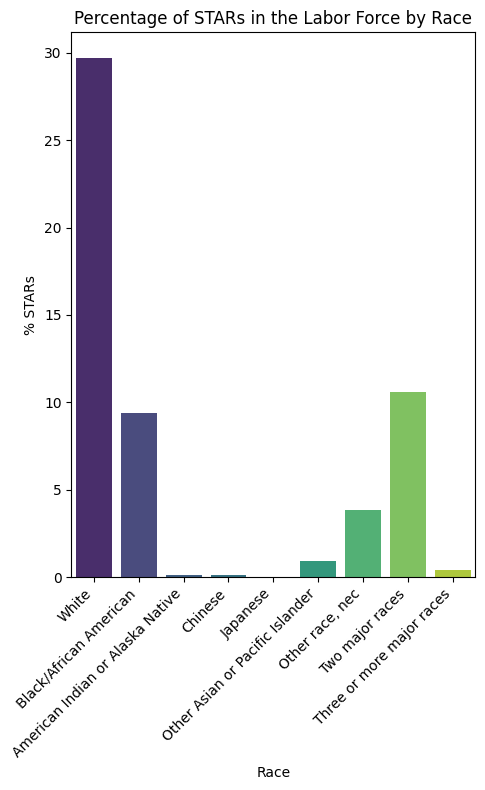

In [103]:
# Create a bar plot to visualize the race distributiion of STARs out of all workers
plt.figure(figsize=(5, 8))
sns.barplot(x='Race', y='% STARs', data=percentages_df, palette='viridis')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Percentage of STARs in the Labor Force by Race')
plt.xlabel('Race')
plt.ylabel('% STARs')

# Display the plot
plt.tight_layout()
plt.show()

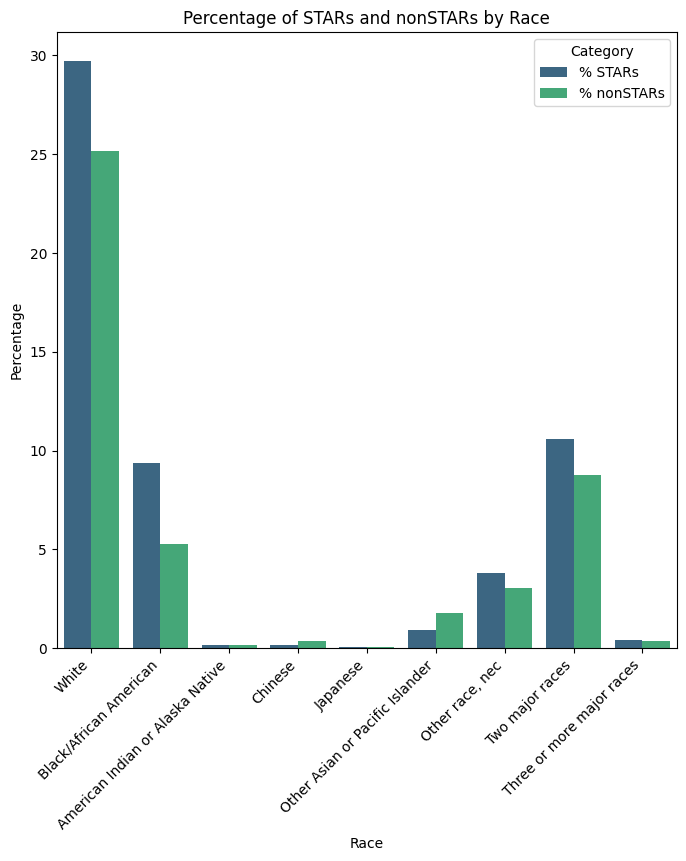

In [105]:
# Melt the DataFrame to plot both % STARs and % nonSTARs on the same bar plot
melted_df = pd.melt(percentages_df, id_vars='Race', var_name='Category', value_name='%')

# Plot using Seaborn
plt.figure(figsize=(8,8))  # Adjust figure size if needed
sns.barplot(x='Race', y='%', hue='Category', data=melted_df, palette='viridis')
plt.title('Percentage of STARs and nonSTARs by Race')
plt.ylabel('Percentage')
plt.xlabel('Race')
# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

In [106]:
#Group categories by 'White' and 'Non-White' for future analysis

def classify_race(race_code):
    if race_code == 1:
        return 'White'
    else:
        return 'Non-White'

# Apply the function to create a new column 'Race Category'
df['Race Category'] = df['race'].apply(classify_race)

# Calculate weighted counts of STARs by Race Category
weighted_STARs_White_NonWhite = df.groupby('Race Category')['STAR'].apply(lambda x: (x * df['perwt'] * 1000).sum())

# Calculate percentage of STARs in the labor force for each Race Category
percent_STARs_White_NonWhite = (weighted_STARs_White_NonWhite / weighted_total) * 100

# Print percentages
display("Percentage of STARs grouped into White and Non-White categories:")
percent_STARs_White_NonWhite

'Percentage of STARs grouped into White and Non-White categories:'

Race Category
Non-White    25.393918
White        29.689807
Name: STAR, dtype: float64

In [107]:
# Calculate percentage of STARs in the labor force for each race
percent_STARsonly_by_race = (weighted_STARs_by_race / weighted_STARs) * 100
percent_nonSTARsonly_by_race = (weighted_nonSTARs_by_race / (weighted_total - weighted_STARs)) * 100

#create dataframe including percentages and labels
percentages_from_STARs_df = pd.DataFrame({
    'Race': [race_labels.get(race, 'Other') for race in percent_STARsonly_by_race.index],
    '% STARs':percent_STARsonly_by_race.values,
    '% nonSTARs':percent_nonSTARsonly_by_race
})

#show results
print("Percentage of STARs in the labor force by race:")
display(percentages_from_STARs_df)


Percentage of STARs in the labor force by race:


,Race,% STARs,% nonSTARs
race,,,
1,White,53.899417,56.015159
2,Black/African American,17.016573,11.769494
3,American Indian or Alaska Native,0.271895,0.299513
4,Chinese,0.245722,0.837056
5,Japanese,0.064685,0.072832
6,Other Asian or Pacific Islander,1.649647,3.985107
7,"Other race, nec",6.923295,6.719793
8,Two major races,19.213250,19.543507
9,Three or more major races,0.715515,0.757538


<ipython-input-108-91504e1dbe76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='% STARs', data=percentages_from_STARs_df, palette='viridis')


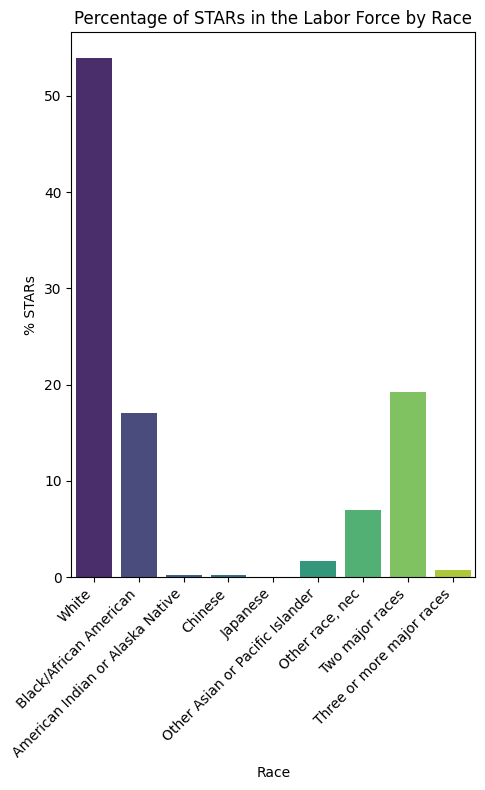

In [108]:
# Create a bar plot to visualize the race distributiion of STARs out of total STARs
plt.figure(figsize=(5, 8))
sns.barplot(x='Race', y='% STARs', data=percentages_from_STARs_df, palette='viridis')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Percentage of STARs in the Labor Force by Race')
plt.xlabel('Race')
plt.ylabel('% STARs')

# Display the plot
plt.tight_layout()
plt.show()

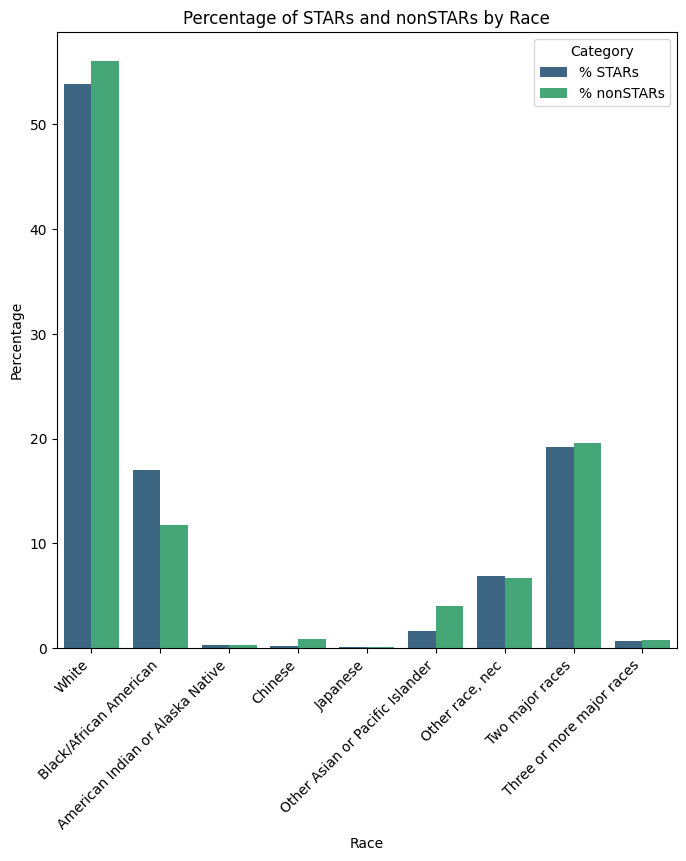

In [109]:
# Melt the DataFrame to plot both % STARs and % nonSTARs on the same bar plot
melted_df = pd.melt(percentages_from_STARs_df, id_vars='Race', var_name='Category', value_name='%')

# Plot using Seaborn
plt.figure(figsize=(8,8))  # Adjust figure size if needed
sns.barplot(x='Race', y='%', hue='Category', data=melted_df, palette='viridis')
plt.title('Percentage of STARs and nonSTARs by Race')
plt.ylabel('Percentage')
plt.xlabel('Race')
# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

In [110]:
#Group categories by 'White' and 'Non-White' for future analysis

def classify_race(race_code):
    if race_code == 1:
        return 'White'
    else:
        return 'Non-White'

# Apply the function to create a new column 'Race Category'
df['Race Category'] = df['race'].apply(classify_race)

# Calculate weighted counts of STARs by Race Category
weighted_STARs_White_NonWhite = df.groupby('Race Category')['STAR'].apply(lambda x: (x * df['perwt'] * 1000).sum())

# Calculate percentage of STARs in the labor force for each Race Category
percent_STARs_White_NonWhite = (weighted_STARs_White_NonWhite / weighted_STARs) * 100

# Print percentages
display("Percentage of STARs grouped into White and Non-White categories:")
percent_STARs_White_NonWhite

'Percentage of STARs grouped into White and Non-White categories:'

Race Category
Non-White    46.100583
White        53.899417
Name: STAR, dtype: float64

In [111]:
# Tie labels from data dictionary to the percentages calculated
hispanic_labels = {
    0:'Not Hispanic',
    1:'Mexican',
    2:'Puerto Rican',
    3:'Cuban',
    4:'Other',
    9:'Not Reported'
}

# Replace race values with labels in orginal data
df['hisp_label'] = df['hispan'].replace(hispanic_labels)
df

,statefip,metro,met2013,perwt,sex,age,race,hispan,educd,empstat,classwkrd,occ,ind,wkswork1,uhrswork,incearn,occ_label,ind_label,STAR,Bach_or_higher,race_label,hisp_label,Race Category
0,12,2,27260,0.097,2,26,1,0,63,1,25,3645,9690,52,40,34500,Medical assistants,U. S. Navy,1,0,White,Not Hispanic,White
1,12,4,36740,0.016,1,33,1,0,71,1,22,4251,7770,52,30,15000,Landscaping and groundskeeping workers,Landscaping services,1,0,White,Not Hispanic,White
2,12,4,0,0.140,1,30,1,0,30,1,22,6260,770,52,40,20800,Construction laborers,Construction (the cleaning of buildings and dw...,0,0,White,Not Hispanic,White
3,12,3,45300,0.092,1,37,8,1,2,1,22,6050,290,52,8,18000,Other agricultural workers,Support activities for agriculture and forestry,0,0,Two major races,Mexican,Non-White
4,12,2,27260,0.030,1,35,2,0,65,1,22,9620,7580,26,30,10400,"Laborers and freight, stock, and material move...",Employment services,1,0,Black/African American,Not Hispanic,Non-White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83758,12,4,19660,0.240,2,55,1,0,65,1,22,3640,7980,52,40,44200,Dental assistants,Offices of dentists,1,0,White,Not Hispanic,White
83759,12,4,19660,0.273,2,25,1,0,65,1,22,4530,7380,52,40,23800,"Baggage porters, bellhops, and concierges",Computer systems design and related services,1,0,White,Not Hispanic,White
83760,12,3,33100,0.069,1,48,8,2,63,1,22,9620,7790,52,40,60000,"Laborers and freight, stock, and material move...",Waste management and remediation services,1,0,Two major races,Puerto Rican,Non-White
83761,12,3,33100,0.059,2,47,1,2,101,1,22,1050,7380,52,40,60000,Computer support specialists,Computer systems design and related services,0,1,White,Puerto Rican,White


In [114]:
hispanic_populations = df.copy()
PERWT = lambda df: (df['perwt'] * 1000).sum()
# Filter for White Not Hispanic
white_not_hispanic = hispanic_populations[
    (hispanic_populations['race_label'] == 'White') &
    ((hispanic_populations['hisp_label'] == 'Not Hispanic') | (hispanic_populations['hisp_label'] == 'Not Reported'))
]
white_other_hispanic = hispanic_populations[
    (hispanic_populations['race_label'] == 'White') &
    (hispanic_populations['hisp_label'].isin(['Mexican', 'Puerto Rican', 'Cuban', 'Other']))
]
# Calculate total weighted sums using PERWT function
total_weighted_whitenonhispanic = PERWT(white_not_hispanic)
total_weighted_whiteotherhispanic = PERWT(white_other_hispanic)

print(total_weighted_whitenonhispanic)
print(total_weighted_whiteotherhispanic )

sum = total_weighted_whitenonhispanic + total_weighted_whiteotherhispanic
print('sum to check', sum)

white =  PERWT(hispanic_populations[(hispanic_populations['race_label'] == 'White')])
print('total_white', white)

white_not_hispanic_STARS = white_not_hispanic[white_not_hispanic['STAR'] == 1]
total_weighted_white_not_hispanic_STARS = PERWT(white_not_hispanic_STARS)
percent_white_not_hispanic_STARs = (total_weighted_white_not_hispanic_STARS / weighted_STARs) * 100
print('White_nonHisp_STARs:',{percent_white_not_hispanic_STARs})

white_other_hispanic_STARS = white_other_hispanic[white_other_hispanic['STAR'] == 1]
total_weighted_white_other_hispanic_STARS = PERWT(white_other_hispanic_STARS)
percent_white_other_hispanic_STARs = (total_weighted_white_other_hispanic_STARS / weighted_STARs) * 100
print('White_other_Hisp_STARs:',{percent_white_other_hispanic_STARs})

4660486.0061454
471812.0001741
sum to check 5132298.0063195
total_white 5132298.0063195005
White_nonHisp_STARs: {48.91083823257036}
White_other_Hisp_STARs: {4.988579195088002}


#What are the five largest occupations in Florida?


*  How do they vary by share of STARs?
*  How do they vary by average salary?

In [115]:
# Drop rows where NaN appears in specific columns
df_cleaned = df.dropna(subset=['occ_label'])

df_cleaned.head()

,statefip,metro,met2013,perwt,sex,age,race,hispan,educd,empstat,classwkrd,occ,ind,wkswork1,uhrswork,incearn,occ_label,ind_label,STAR,Bach_or_higher,race_label,hisp_label,Race Category
0,12,2,27260,0.097,2,26,1,0,63,1,25,3645,9690,52,40,34500,Medical assistants,U. S. Navy,1,0,White,Not Hispanic,White
1,12,4,36740,0.016,1,33,1,0,71,1,22,4251,7770,52,30,15000,Landscaping and groundskeeping workers,Landscaping services,1,0,White,Not Hispanic,White
2,12,4,0,0.140,1,30,1,0,30,1,22,6260,770,52,40,20800,Construction laborers,Construction (the cleaning of buildings and dw...,0,0,White,Not Hispanic,White
3,12,3,45300,0.092,1,37,8,1,2,1,22,6050,290,52,8,18000,Other agricultural workers,Support activities for agriculture and forestry,0,0,Two major races,Mexican,Non-White
4,12,2,27260,0.030,1,35,2,0,65,1,22,9620,7580,26,30,10400,"Laborers and freight, stock, and material move...",Employment services,1,0,Black/African American,Not Hispanic,Non-White


In [116]:
df = df_cleaned
# Check for NaN values in the entire DataFrame
print(df.isna().sum())

# Alternatively, use .info() for a concise summary
print(df.info())

statefip          0
metro             0
met2013           0
perwt             0
sex               0
age               0
race              0
hispan            0
educd             0
empstat           0
classwkrd         0
occ               0
ind               0
wkswork1          0
uhrswork          0
incearn           0
occ_label         0
ind_label         0
STAR              0
Bach_or_higher    0
race_label        0
hisp_label        0
Race Category     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 83380 entries, 0 to 83762
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statefip        83380 non-null  int64  
 1   metro           83380 non-null  int64  
 2   met2013         83380 non-null  int64  
 3   perwt           83380 non-null  float64
 4   sex             83380 non-null  int64  
 5   age             83380 non-null  int64  
 6   race            83380 non-null  int64  
 7   hispan       

###Industry

In [126]:
# Calculate weighted counts of individuals in each INDUSTRY
weighted_ind = df.groupby('ind_label')['perwt'].apply(lambda x: (x * 1000).sum())
weighted_STARs_by_ind = df.groupby('ind_label').apply(lambda x: (x['STAR'] * x['perwt'] * 1000).sum())

# Sort industries by weighted counts to find the largest ones
weighted_ind_sorted = weighted_ind.sort_values(ascending=False)

# Create the data frame for industries
ranked_ind = pd.DataFrame({
    'ind_label': weighted_ind_sorted.index,
    'Weighted_workers': weighted_ind_sorted.values,
    'Rank': range(1, len(weighted_ind_sorted) + 1)
})

# Calculate average earnings for each INDUSTRY
avg_wages = df.groupby('ind_label')['incearn'].mean()
ranked_ind['avg_wages'] = avg_wages.reindex(ranked_ind['ind_label']).values

# Add total STARs and percent STARs corrected with perwt
ranked_ind['Weighted_STARs'] = weighted_STARs_by_ind.reindex(ranked_ind['ind_label']).values
ranked_ind['%STARs'] = (ranked_ind['Weighted_STARs'] / ranked_ind['Weighted_workers']) * 100
ranked_ind['%nonSTARs'] = abs(ranked_ind['%STARs'] - 100)
ranked_ind['%STARs_outofallworkers'] = (ranked_ind['Weighted_STARs'] / weighted_total) * 100
ranked_ind['%nonSTARs_outofallworkers'] = ((ranked_ind['Weighted_workers'] -ranked_ind['Weighted_STARs']) / weighted_total) * 100


# Display the first few rows for verification
print("Top Industries in Florida (weighted by perwt) with ranking, average wages, and STARs information:")
display(ranked_ind.head(5))

Top Industries in Florida (weighted by perwt) with ranking, average wages, and STARs information:


,ind_label,Weighted_workers,Rank,avg_wages,Weighted_STARs,%STARs,%nonSTARs,%STARs_outofallworkers,%nonSTARs_outofallworkers
0,Construction (the cleaning of buildings and dw...,793419.000699,1,54644.790969,518506.000529,65.350842,34.649158,5.541361,2.938041
1,Elementary and secondary schools,480300.000490,2,42825.328032,131952.000089,27.472829,72.527171,1.410193,3.722854
2,"General medical and surgical hospitals, and sp...",413750.000745,3,72586.307270,187793.000535,45.388036,54.611964,2.006975,2.414840
3,Restaurants and other food services,407433.000376,4,31577.009926,272956.000251,66.994082,33.005918,2.917127,1.437178
4,"Lessors of real estate, and offices of real es...",205532.000297,5,73227.566717,104975.999985,51.075258,48.924742,1.121896,1.074659


###Occupation

In [127]:
# Calculate weighted counts of individuals in each OCCUPATION
weighted_occupations = df.groupby('occ_label')['perwt'].apply(lambda x: (x * 1000).sum())
weighted_STARs_by_occupation = df.groupby('occ_label').apply(lambda x: (x['STAR'] * x['perwt'] * 1000).sum())

# Sort occupations by weighted counts to find the largest ones
weighted_occupations_sorted = weighted_occupations.sort_values(ascending=False)


# Create the data frame
ranked_occupations = pd.DataFrame({
    'occ_label': weighted_occupations_sorted.index,
    'Weighted_workers': weighted_occupations_sorted.values,
    'Rank': range(1, len(weighted_occupations_sorted) + 1)
})



# Calculate average earnings for each occupation
avg_wages = df.groupby('occ_label')['incearn'].mean()
ranked_occupations['avg_wages'] = avg_wages.reindex(ranked_occupations['occ_label']).values



# Add total STARs and percent STARs corrected with perwt
ranked_occupations['Weighted_STARs'] = weighted_STARs_by_occupation.reindex(ranked_occupations['occ_label']).values
ranked_occupations['%STARs'] = (ranked_occupations['Weighted_STARs'] / ranked_occupations['Weighted_workers']) * 100
ranked_occupations['%nonSTARs'] = abs(ranked_occupations['%STARs'] - 100)
ranked_occupations['%STARs_outofallworkers'] = (ranked_occupations['Weighted_STARs'] / weighted_total) * 100
ranked_occupations['%nonSTARs_outofallworkers'] = ((ranked_occupations['Weighted_workers'] -ranked_occupations['Weighted_STARs']) / weighted_total) * 100


# Display the first few rows for verification
print("Top occupations in Florida (weighted by perwt) with ranking, average wages, and STARs information:")
display(ranked_occupations.head(5))

Top occupations in Florida (weighted by perwt) with ranking, average wages, and STARs information:


,occ_label,Weighted_workers,Rank,avg_wages,Weighted_STARs,%STARs,%nonSTARs,%STARs_outofallworkers,%nonSTARs_outofallworkers
0,Other managers,307685.000521,1,99590.642957,144303.000157,46.899589,53.100411,1.542190,1.746091
1,Driver/sales workers and truck drivers,232304.000401,2,44540.443355,177720.000406,76.503203,23.496797,1.899323,0.583348
2,Customer service representatives,220900.000391,3,35370.722823,158459.000262,71.733364,28.266636,1.693478,0.667317
3,Registered nurses,219941.000397,4,65450.463576,80486.000096,36.594359,63.405641,0.860167,1.490379
4,First-line supervisors of retail sales workers,195786.000330,5,59795.215160,135229.000350,69.069801,30.930199,1.445215,0.647183


In [128]:
#Explore occupations by race

weighted_occupations_sorted = weighted_occupations.sort_values(ascending=False).head(5).index.tolist()

# isolate top 5 occupations based on weighted counts
top_occupations = weighted_occupations.sort_values(ascending=False).head(5).index.tolist()
df_top_occupations = df[df['occ_label'].isin(top_occupations)]

# Group by occupation and Race Category, calculate weighted sum of perwt
grouped = df_top_occupations.groupby(['occ_label', 'Race Category'])['perwt'].sum() * 1000

# Calculate total weighted perwt for each occupation
total_perwt_by_occ = grouped.groupby(level=0).sum()

# Calculate percentages for each occupation
percentages = grouped / total_perwt_by_occ * 100

# Reset index to turn the multi-index into columns
percentages = percentages.reset_index()

# Pivot to have White and Non-White as columns
percentages = percentages.pivot(index='occ_label', columns='Race Category', values='perwt').reset_index()

# Rename columns
percentages.columns.name = None  # Remove the name of the columns index
percentages.columns = ['Occupation', '% White', '% Non-White']

print("Percentage of White and Non-White workers for each of the top 5 occupations:")
print(percentages)

Percentage of White and Non-White workers for each of the top 5 occupations:
                                       Occupation    % White  % Non-White
0                Customer service representatives  52.588954    47.411046
1          Driver/sales workers and truck drivers  60.272316    39.727684
2  First-line supervisors of retail sales workers  35.839641    64.160359
3                                  Other managers  35.179161    64.820839
4                               Registered nurses  44.971606    55.028394


In [131]:
# Filter the DataFrame to include only the top occupations and STARs
df_top_occupations_stars = df[(df['occ_label'].isin(top_occupations)) & (df['STAR'] == 1)]

# Group by occupation and Race Category, calculate weighted sum of perwt for STARs
grouped_stars = df_top_occupations_stars.groupby(['occ_label', 'Race Category'])['perwt'].sum() * 1000

# Calculate total weighted perwt for each occupation for STARs
total_perwt_by_occ_stars = grouped_stars.groupby(level=0).sum()

# Calculate percentages for each occupation for STARs
percentages_stars = grouped_stars / total_perwt_by_occ_stars *100

# Reset index to turn the multi-index into columns
percentages_stars = percentages_stars.reset_index()

# Pivot to have White and Non-White as columns
percentages_stars = percentages_stars.pivot(index='occ_label', columns='Race Category', values='perwt').reset_index()


# Rename columns
percentages_stars.columns.name = None  # Remove the name of the columns index
percentages_stars.columns = ['Occupation', '% White STARs', '% Non-White STARs']

print("Percentage of White and Non-White STARs for each of the top 5 occupations:")
print(percentages_stars)

Percentage of White and Non-White STARs for each of the top 5 occupations:
                                       Occupation  % White STARs  \
0                Customer service representatives      52.979635   
1          Driver/sales workers and truck drivers      59.853140   
2  First-line supervisors of retail sales workers      34.833505   
3                                  Other managers      34.794148   
4                               Registered nurses      45.053798   

   % Non-White STARs  
0          47.020365  
1          40.146860  
2          65.166495  
3          65.205852  
4          54.946202  


In [132]:
# Display column names to verify
print("Columns in ranked_occupations:", ranked_occupations.columns)
print("Columns in percentages:", percentages.columns)

# Merge ranked_occupations and percentages on the correct columns
combined_table = pd.merge(ranked_occupations, percentages_stars, left_on='occ_label', right_on='Occupation')

# Drop the duplicate 'Occupation' column if needed
combined_table.drop('Occupation', axis=1, inplace=True)

# Display the combined table
print("Combined table of top occupations with ranking, average wages, STARs, and race percentages:")
display(combined_table)

Columns in ranked_occupations: Index(['occ_label', 'Weighted_workers', 'Rank', 'avg_wages', 'Weighted_STARs',
       '%STARs', '%nonSTARs', '%STARs_outofallworkers',
       '%nonSTARs_outofallworkers'],
      dtype='object')
Columns in percentages: Index(['Occupation', '% White', '% Non-White'], dtype='object')
Combined table of top occupations with ranking, average wages, STARs, and race percentages:


,occ_label,Weighted_workers,Rank,avg_wages,Weighted_STARs,%STARs,%nonSTARs,%STARs_outofallworkers,%nonSTARs_outofallworkers,% White STARs,% Non-White STARs
0,Other managers,307685.000521,1,99590.642957,144303.000157,46.899589,53.100411,1.542190,1.746091,34.794148,65.205852
1,Driver/sales workers and truck drivers,232304.000401,2,44540.443355,177720.000406,76.503203,23.496797,1.899323,0.583348,59.853140,40.146860
2,Customer service representatives,220900.000391,3,35370.722823,158459.000262,71.733364,28.266636,1.693478,0.667317,52.979635,47.020365
3,Registered nurses,219941.000397,4,65450.463576,80486.000096,36.594359,63.405641,0.860167,1.490379,45.053798,54.946202
4,First-line supervisors of retail sales workers,195786.000330,5,59795.215160,135229.000350,69.069801,30.930199,1.445215,0.647183,34.833505,65.166495


##Is there a relationship between share of STARs and wages

<ipython-input-134-1c7e9182bed9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


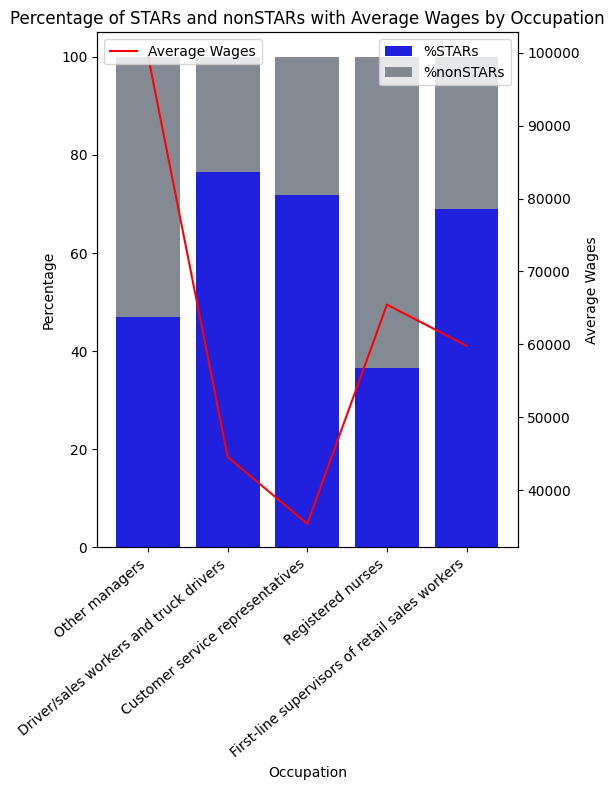

In [134]:
#Plot figure to show the relationship between the wages of the top 5 occupations vs the share of STARs
plt.figure(figsize=(6, 8))

# Plotting salary on secondary axis
ax = sns.barplot(x='occ_label', y='%STARs', data=combined_table, color='blue', label='%STARs')
ax = sns.barplot(x='occ_label', y='%nonSTARs', data=combined_table, color='#818a96', bottom=combined_table['%STARs'], label='%nonSTARs')

# Adding average wages as a line plot on secondary axis
ax2 = ax.twinx()
sns.lineplot(x='occ_label', y='avg_wages', data=combined_table, ax=ax2, color='Red', label='Average Wages')
plt.legend(loc='upper left')

ax.set_xlabel('Occupation')
ax.set_ylabel('Percentage')
ax2.set_ylabel('Average Wages')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

plt.title('Percentage of STARs and nonSTARs with Average Wages by Occupation')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

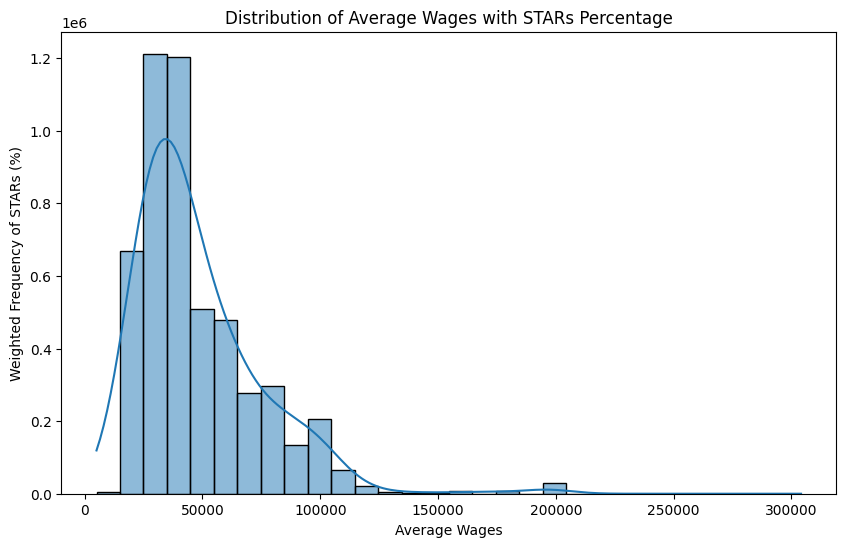

In [135]:
#Plot the distibution of stars accross wages

# Ensure the necessary columns are in the DataFrame
data = ranked_occupations[['avg_wages', 'Weighted_STARs']].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, x='avg_wages', weights=data['Weighted_STARs'], bins=30, kde=True)

# Add titles and labels
plt.title('Distribution of Average Wages with STARs Percentage')
plt.xlabel('Average Wages')
plt.ylabel('Weighted Frequency of STARs (%)')

plt.show()

We see right skewed population

In [139]:
#confirm non-normal distribution with sharpiro wilks test for normality
data = ranked_occupations

# Filter the DataFrame to include only STARs population
stars_data = data[data['Weighted_STARs']>0]

# Perform the Shapiro-Wilk test for normality on average wages of STARs population
stat, p_value = shapiro(stars_data['avg_wages'].dropna())

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}", 'suggesting non-normal distribution')

#not normally distibuted if p<0.05

Shapiro-Wilk Test Statistic: 0.8863494396209717
P-value: 1.0329213172054326e-18 suggesting non-normal distribution


#Other analysis

##How does the share of STARs vary by Sex?

In [148]:
# Calculate the weighted counts of STARs and non-STARs by sex
weighted_STARs_by_sex = df[df['STAR'] == 1].groupby('sex')['perwt'].apply(lambda x: (x * 1000).sum())
weighted_nonSTARs_by_sex = df[df['STAR'] == 0].groupby('sex')['perwt'].apply(lambda x: (x * 1000).sum())

# Calculate the total weighted counts of STARs and non-STARs by sex
weighted_total_STARs_by_sex = weighted_STARs_by_sex.sum()
weighted_total_nonSTARs_by_sex = weighted_nonSTARs_by_sex.sum()

# Calculate percentages
percent_STARs_by_sex = (weighted_STARs_by_sex / weighted_total_STARs_by_sex) * 100
percent_nonSTARs_by_sex = (weighted_nonSTARs_by_sex / weighted_total_nonSTARs_by_sex) * 100

# Create a DataFrame to display the results
results_df_sex = pd.DataFrame({
    'Sex': percent_STARs_by_sex.index,
    '% STARs': percent_STARs_by_sex.values,
    '% Non-STARs': percent_nonSTARs_by_sex.values
})

# Display the results
print("Percentage of STARs and Non-STARs by sex:")
display(results_df_sex)

Percentage of STARs and Non-STARs by sex:


,Sex,% STARs,% Non-STARs
0,1,53.789028,51.487578
1,2,46.210972,48.512422


In [147]:
# Calculate average wages for STARs and non-STARs by sex
avg_wages_STARs = df[df['STAR'] == 1].groupby('sex')['incearn'].mean()
avg_wages_nonSTARs = df[df['STAR'] == 0].groupby('sex')['incearn'].mean()

# Create a DataFrame to display the results
results_df_wages = pd.DataFrame({
    'Sex': avg_wages_STARs.index,
    'Average Salary STARs': avg_wages_STARs.values,
    'Average Salary Non-STARs': avg_wages_nonSTARs.values
})

# Display the results
print("Average Salary by sex for STARs and Non-STARs:")
display(results_df_wages)

#1 = male
#2 = female

Average Salary by sex for STARs and Non-STARs:


,Sex,Average Salary STARs,Average Salary Non-STARs
0,1,51367.721818,93665.558328
1,2,35997.349173,61420.838013


In [149]:
#Look at STAR salaries by Sex classification and calcualte the difference between male and female STARs and nonSTARs
# Filter data by groups
male_STARs = df[df['sex'] == 1].loc[df['STAR'] == 1, 'incearn']
female_STARs = df[df['sex'] == 2].loc[df['STAR'] == 1, 'incearn']
male_nonSTARs = df[df['sex'] == 1].loc[df['STAR'] == 0, 'incearn']
female_nonSTARs = df[df['sex'] == 2].loc[df['STAR'] == 0, 'incearn']

# Calculate salary differences
diff_STARs = male_STARs.mean() - female_STARs.mean()
diff_nonSTARs = male_nonSTARs.mean() - female_nonSTARs.mean()

# Display results
print("Average Salary Differences:")
print(f"Male STARs vs Female STARs: {diff_STARs:.2f}", 'greater for men')
print(f"Male non-STARs vs Female non-STARs: {diff_nonSTARs:.2f}", 'greater for men')

Average Salary Differences:
Male STARs vs Female STARs: 15370.37 greater for men
Male non-STARs vs Female non-STARs: 32244.72 greater for men


##Do STARs reside in metro areas?

In [151]:
# Define metropolitan and non-metropolitan categories
metro_values = [2, 3, 4]
non_metro_values = [1, 0]

# Calculate the total weighted count of STARs in metropolitan areas
weighted_stars_metro = (df[(df['STAR'] == 1) & (df['metro'].isin(metro_values))]['perwt'] * 1000).sum()

# Calculate the percentage of STARs in metropolitan areas relative to the total STAR population
percent_stars_metro = (weighted_stars_metro / weighted_STARs) * 100

print(f"Percentage of STARs living in metropolitan areas: {percent_stars_metro:.2f}%")

Percentage of STARs living in metropolitan areas: 93.86%


In [152]:
# Calculate weighted counts of each race in metro and non-metro areas for all workers
weighted_race_metro = df[df['metro'].isin(metro_values)].groupby('race')['perwt'].sum()
weighted_race_nonmetro = df[df['metro'].isin(non_metro_values)].groupby('race')['perwt'].sum()


# Total weighted counts of each race
total_weighted_race = df.groupby('race')['perwt'].sum()

# Calculate percentages
percent_race_metro = (weighted_race_metro / total_weighted_race) * 100
percent_race_nonmetro = (weighted_race_nonmetro / total_weighted_race) * 100

# Create DataFrame for percentages
race_labels = {
    1: 'White',
    2: 'Black/African American',
    3: 'American Indian or Alaska Native',
    4: 'Chinese',
    5: 'Japanese',
    6: 'Other Asian or Pacific Islander',
    7: 'Other race, nec',
    8: 'Two major races',
    9: 'Three or more major races'
}

percentages_race_df = pd.DataFrame({
    'Race': [race_labels.get(race, 'Other') for race in percent_race_metro.index],
    '% in Metro': percent_race_metro.values,
    '% in Non-Metro': percent_race_nonmetro.values
})

# Display the percentages by race
print("Percentage of each race in metropolitan vs. non-metropolitan areas for all workers:")
display(percentages_race_df)

Percentage of each race in metropolitan vs. non-metropolitan areas:


,Race,% in Metro,% in Non-Metro
0,White,93.451048,6.548952
1,Black/African American,96.388150,3.611850
2,American Indian or Alaska Native,90.677421,9.322579
3,Chinese,98.919427,1.080573
4,Japanese,96.950743,3.049257
5,Other Asian or Pacific Islander,97.899925,2.100075
6,"Other race, nec",96.970379,3.029621
7,Two major races,97.213736,2.786264
8,Three or more major races,96.562687,3.437313


In [153]:
# Calculate the total weighted counts of STARs in metro and non-metro areas
weighted_stars_metro = (df[(df['STAR'] == 1) & (df['metro'].isin(metro_values))]['perwt'] * 1000).sum()
weighted_stars_nonmetro = (df[(df['STAR'] == 1) & (df['metro'].isin(non_metro_values))]['perwt'] * 1000).sum()

# Calculate the total weighted counts of non-STARs in metro and non-metro areas
weighted_nonstars_metro = (df[(df['STAR'] == 0) & (df['metro'].isin(metro_values))]['perwt'] * 1000).sum()
weighted_nonstars_nonmetro = (df[(df['STAR'] == 0) & (df['metro'].isin(non_metro_values))]['perwt'] * 1000).sum()

# Calculate total weighted counts of STARs and non-STARs
weighted_total_stars = weighted_stars_metro + weighted_stars_nonmetro
weighted_total_nonstars = weighted_nonstars_metro + weighted_nonstars_nonmetro

# Calculate percentages
percent_stars_metro = (weighted_stars_metro / weighted_total_stars) * 100
percent_stars_nonmetro = (weighted_stars_nonmetro / weighted_total_stars) * 100

percent_nonstars_metro = (weighted_nonstars_metro / weighted_total_nonstars) * 100
percent_nonstars_nonmetro = (weighted_nonstars_nonmetro / weighted_total_nonstars) * 100

# Display the percentages
print(f"Percentage of STARs in metropolitan areas: {percent_stars_metro:.2f}%")
print(f"Percentage of STARs in non-metropolitan areas: {percent_stars_nonmetro:.2f}%")
print(f"Percentage of non-STARs in metropolitan areas: {percent_nonstars_metro:.2f}%")
print(f"Percentage of non-STARs in non-metropolitan areas: {percent_nonstars_nonmetro:.2f}%")

Percentage of STARs in metropolitan areas: 94.29%
Percentage of STARs in non-metropolitan areas: 5.71%
Percentage of non-STARs in metropolitan areas: 95.90%
Percentage of non-STARs in non-metropolitan areas: 4.10%


In [154]:
# Define metropolitan and non-metropolitan categories
metro_values = [2, 3, 4]  # Values for metro areas
non_metro_values = [1, 0]  # Values for non-metro areas

# Calculate the weighted counts of STARs and non-STARs by race in metro and non-metro areas
weighted_STARs_by_race_metro = df[(df['STAR'] == 1) & (df['metro'].isin(metro_values))].groupby('race')['perwt'].apply(lambda x: (x * 1000).sum())
weighted_STARs_by_race_nonmetro = df[(df['STAR'] == 1) & (df['metro'].isin(non_metro_values))].groupby('race')['perwt'].apply(lambda x: (x * 1000).sum())

weighted_nonSTARs_by_race_metro = df[(df['STAR'] == 0) & (df['metro'].isin(metro_values))].groupby('race')['perwt'].apply(lambda x: (x * 1000).sum())
weighted_nonSTARs_by_race_nonmetro = df[(df['STAR'] == 0) & (df['metro'].isin(non_metro_values))].groupby('race')['perwt'].apply(lambda x: (x * 1000).sum())

# Calculate the total weighted counts of STARs and non-STARs by race
weighted_total_STARs_by_race = df[df['STAR'] == 1].groupby('race')['perwt'].apply(lambda x: (x * 1000).sum())
weighted_total_nonSTARs_by_race = df[df['STAR'] == 0].groupby('race')['perwt'].apply(lambda x: (x * 1000).sum())

# Calculate percentages
percent_STARs_by_race_metro = (weighted_STARs_by_race_metro / weighted_total_STARs_by_race) * 100
percent_STARs_by_race_nonmetro = (weighted_STARs_by_race_nonmetro / weighted_total_STARs_by_race) * 100

percent_nonSTARs_by_race_metro = (weighted_nonSTARs_by_race_metro / weighted_total_nonSTARs_by_race) * 100
percent_nonSTARs_by_race_nonmetro = (weighted_nonSTARs_by_race_nonmetro / weighted_total_nonSTARs_by_race) * 100

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Race': percent_STARs_by_race_metro.index.map(race_labels.get),
    '% STARs Metro': percent_STARs_by_race_metro.values,
    '% STARs Non-Metro': percent_STARs_by_race_nonmetro.values,
    '% Non-STARs Metro': percent_nonSTARs_by_race_metro.values,
    '% Non-STARs Non-Metro': percent_nonSTARs_by_race_nonmetro.values
})

# Display the results
print("Percentage of STARs and Non-STARs by race in metropolitan vs non-metropolitan areas:")
display(results_df)

Percentage of STARs and Non-STARs by race in metropolitan vs non-metropolitan areas:


,Race,% STARs Metro,% STARs Non-Metro,% Non-STARs Metro,% Non-STARs Non-Metro
0,White,92.249641,7.750359,94.868049,5.131951
1,Black/African American,96.097360,3.902640,96.904516,3.095484
2,American Indian or Alaska Native,92.914122,7.085878,88.186329,11.813671
3,Chinese,100.000000,NaN,98.530415,1.469585
4,Japanese,97.000600,2.999400,96.896439,3.103561
5,Other Asian or Pacific Islander,97.248453,2.751547,98.231730,1.768270
6,"Other race, nec",97.398063,2.601937,96.430173,3.569827
7,Two major races,96.910140,3.089860,97.579493,2.420507
8,Three or more major races,96.765851,3.234149,96.328287,3.671713


##Confirm relationship between wages and share of STARs

###STARs

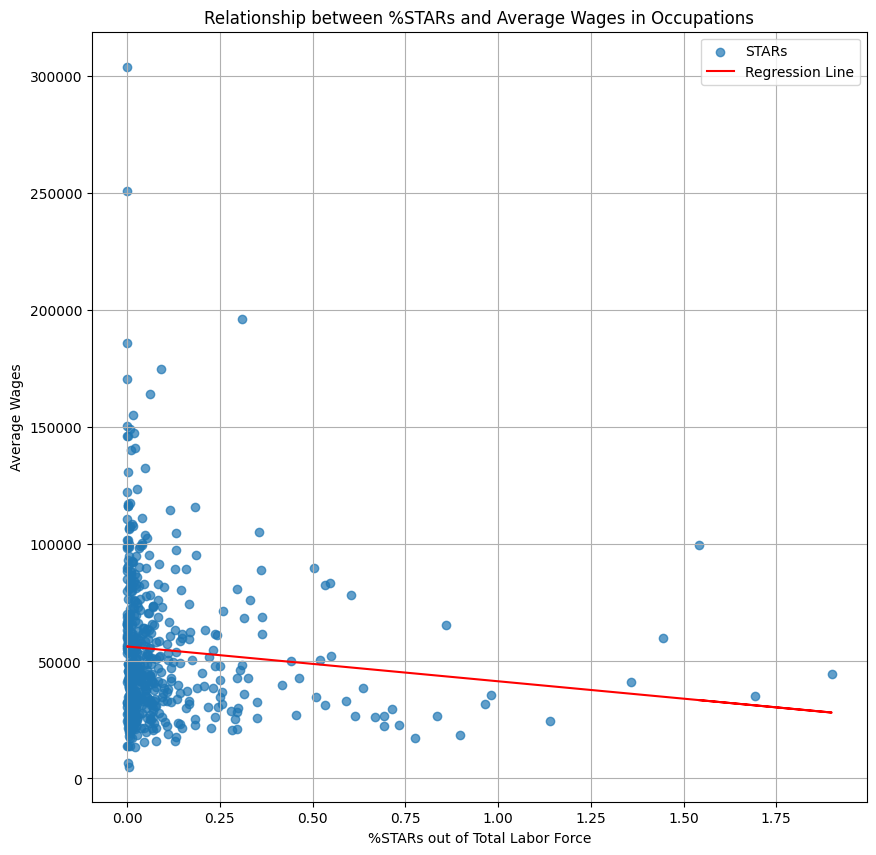

Correlation coefficient: -0.098331352533814


In [155]:
#More stars are in lower paying jobs
avg_wages = ranked_occupations['avg_wages']
percent_stars = ranked_occupations['%STARs_outofallworkers']

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(percent_stars, avg_wages)
line = slope * percent_stars + intercept

# Plotting the scatter plot and regression line
plt.figure(figsize=(10, 10))
plt.scatter(percent_stars, avg_wages, alpha=0.7, label='STARs')
plt.plot(percent_stars, line, color='red', label='Regression Line')

plt.title('Relationship between %STARs and Average Wages in Occupations')
plt.xlabel('%STARs out of Total Labor Force')
plt.ylabel('Average Wages')
plt.grid(True)
plt.legend()
plt.show()

print(f"Correlation coefficient: {r_value}")

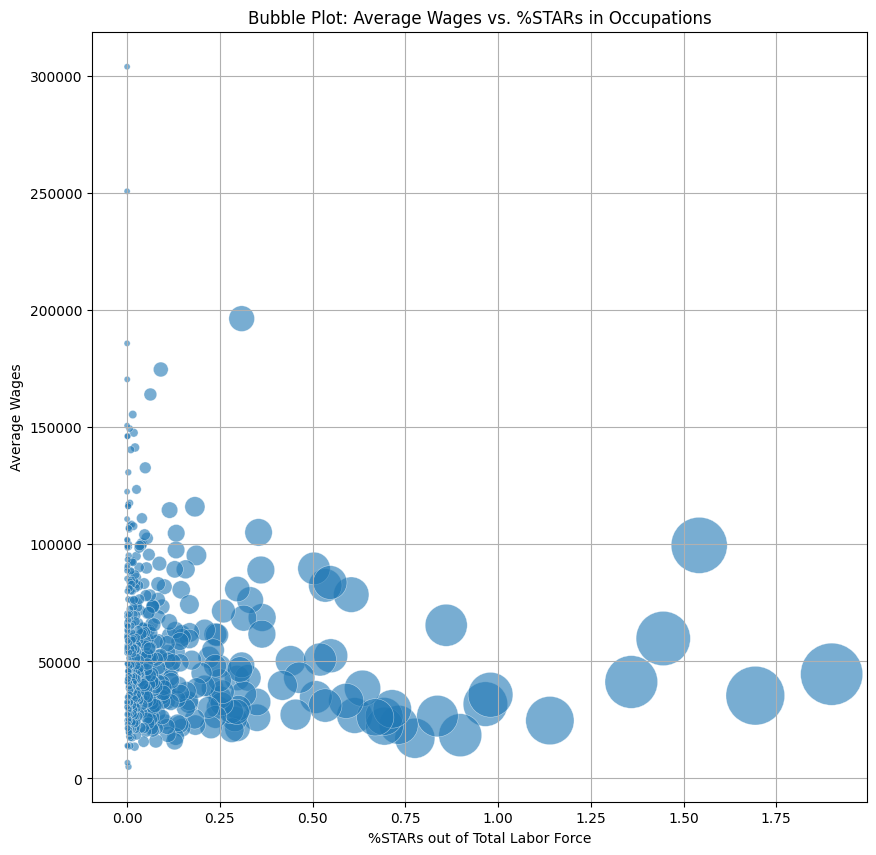

In [156]:
# Bubble plot
plt.figure(figsize=(10, 10))
sns.scatterplot(y='avg_wages', x='%STARs_outofallworkers', size='Weighted_STARs', data=ranked_occupations, legend=False, sizes=(20, 2000), alpha=0.6)
plt.title('Bubble Plot: Average Wages vs. %STARs in Occupations')
plt.ylabel('Average Wages')
plt.xlabel('%STARs out of Total Labor Force')
plt.grid(True)
plt.show()

###nonSTARs, degree holders

In [158]:
weighted_degree_holder_by_occupation = df.groupby('occ_label').apply(lambda x: (x['Bach_or_higher'] * x['perwt'] * 1000).sum())
display(weighted_degree_holder_by_occupation)

occ_label
Accountants and auditors                                              91952.000189
Actors                                                                 1247.999994
Actuaries                                                               696.999998
Acupuncturists                                                          825.000009
Administrative services managers                                       2648.000006
                                                                          ...     
Welding, soldering, and brazing workers                                 382.000006
Wholesale and retail buyers, except farm products                      5746.999985
Woodworking machine setters, operators, and tenders, except sawing        0.000000
Word processors and typists                                             301.000014
Writers and authors                                                    7756.000020
Length: 522, dtype: float64

In [159]:
ranked_occupations['Weighted_degree_holder'] = weighted_degree_holder_by_occupation.reindex(ranked_occupations['occ_label']).values
ranked_occupations['%degree_holder'] = (ranked_occupations['Weighted_degree_holder'] / weighted_total) * 100
display(ranked_occupations.head())

,occ_label,Weighted_workers,Rank,avg_wages,Weighted_STARs,%STARs,%nonSTARs,%STARs_outofallworkers,%nonSTARs_outofallworkers,Weighted_degree_holder,%degree_holder
0,Other managers,307685.000521,1,99590.642957,144303.000157,46.899589,53.100411,1.542190,1.746091,153978.000339,1.645589
1,Driver/sales workers and truck drivers,232304.000401,2,44540.443355,177720.000406,76.503203,23.496797,1.899323,0.583348,23385.999999,0.249930
2,Customer service representatives,220900.000391,3,35370.722823,158459.000262,71.733364,28.266636,1.693478,0.667317,52137.000144,0.557197
3,Registered nurses,219941.000397,4,65450.463576,80486.000096,36.594359,63.405641,0.860167,1.490379,136889.000294,1.462956
4,First-line supervisors of retail sales workers,195786.000330,5,59795.215160,135229.000350,69.069801,30.930199,1.445215,0.647183,50367.999982,0.538291


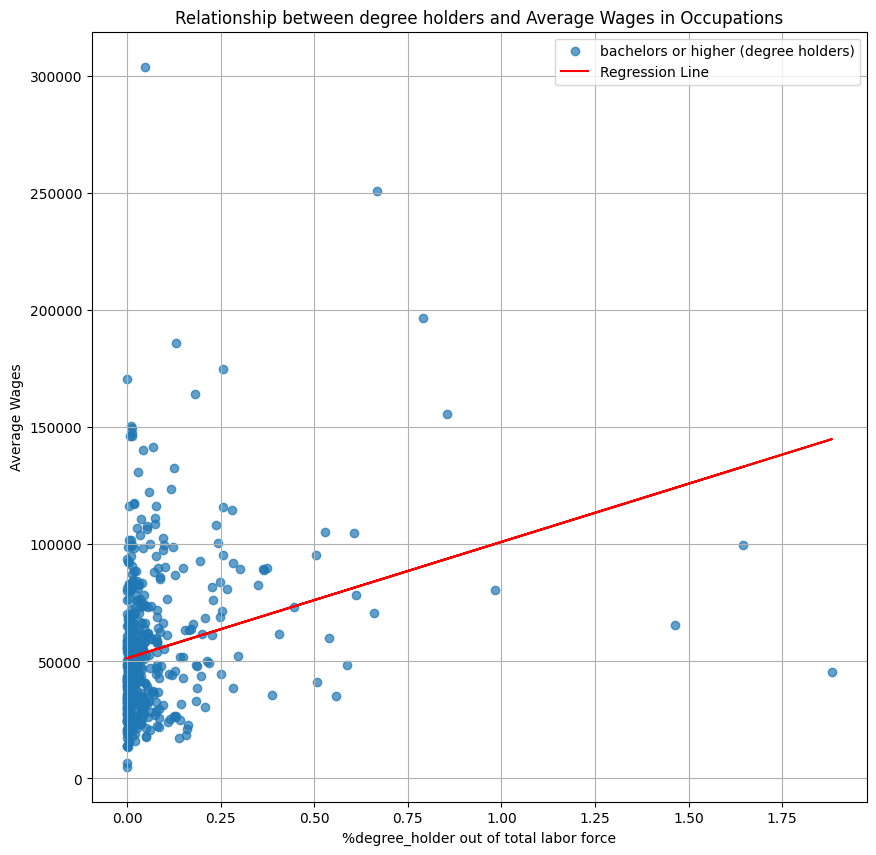

Correlation coefficient: 0.25919789526163667


In [160]:
from scipy.stats import linregress
avg_wages = ranked_occupations['avg_wages']
percent_stars = ranked_occupations['%degree_holder']

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(percent_stars, avg_wages)
line = slope * percent_stars + intercept

# Plotting the scatter plot and regression line
plt.figure(figsize=(10, 10))
plt.scatter(percent_stars, avg_wages, alpha=0.7, label='bachelors or higher (degree holders)')
plt.plot(percent_stars, line, color='red', label='Regression Line')

plt.title('Relationship between degree holders and Average Wages in Occupations')
plt.xlabel('%degree_holder out of total labor force')
plt.ylabel('Average Wages')
plt.grid(True)
plt.legend()
plt.show()

print(f"Correlation coefficient: {r_value}")

##How do the hours worked and the salary vary in the top 5 occupations for nonSTARs and STARs?

In [161]:
# Calculate weighted hours worked for each occupation
weighted_uhrswork = df.groupby('occ_label')['uhrswork'].apply(lambda x: (x * df['perwt'] * 1000).sum())
ranked_occupations['Weighted_uhrswork'] = weighted_uhrswork.reindex(ranked_occupations['occ_label']).values

# Calculate weighted hours worked for STARs and non-STARs
weighted_uhrswork_STARs = df[df['STAR'] == 1].groupby('occ_label')['uhrswork'].apply(lambda x: (x * df['perwt'] * 1000).sum())
weighted_uhrswork_nonSTARs = df[df['STAR'] == 0].groupby('occ_label')['uhrswork'].apply(lambda x: (x * df['perwt'] * 1000).sum())
ranked_occupations['Weighted_uhrswork_STARs'] = weighted_uhrswork_STARs.reindex(ranked_occupations['occ_label']).values
ranked_occupations['Weighted_uhrswork_nonSTARs'] = weighted_uhrswork_nonSTARs.reindex(ranked_occupations['occ_label']).values

# Display the first few rows for verification
print("Top occupations in Florida (weighted by perwt) with ranking, average wages, and STARs information:")
display(ranked_occupations.head(5))

Top occupations in Florida (weighted by perwt) with ranking, average wages, and STARs information:


,occ_label,Weighted_workers,Rank,avg_wages,Weighted_STARs,%STARs,%nonSTARs,%STARs_outofallworkers,%nonSTARs_outofallworkers,Weighted_degree_holder,%degree_holder,Weighted_uhrswork,Weighted_uhrswork_STARs,Weighted_uhrswork_nonSTARs
0,Other managers,307685.000521,1,99590.642957,144303.000157,46.899589,53.100411,1.542190,1.746091,153978.000339,1.645589,1.314296e+07,5.970956e+06,7.171999e+06
1,Driver/sales workers and truck drivers,232304.000401,2,44540.443355,177720.000406,76.503203,23.496797,1.899323,0.583348,23385.999999,0.249930,1.018791e+07,7.900547e+06,2.287367e+06
2,Customer service representatives,220900.000391,3,35370.722823,158459.000262,71.733364,28.266636,1.693478,0.667317,52137.000144,0.557197,8.249332e+06,5.860773e+06,2.388559e+06
3,Registered nurses,219941.000397,4,65450.463576,80486.000096,36.594359,63.405641,0.860167,1.490379,136889.000294,1.462956,8.502912e+06,3.075978e+06,5.426934e+06
4,First-line supervisors of retail sales workers,195786.000330,5,59795.215160,135229.000350,69.069801,30.930199,1.445215,0.647183,50367.999982,0.538291,8.192983e+06,5.608838e+06,2.584145e+06


<ipython-input-164-0be96fde35b3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


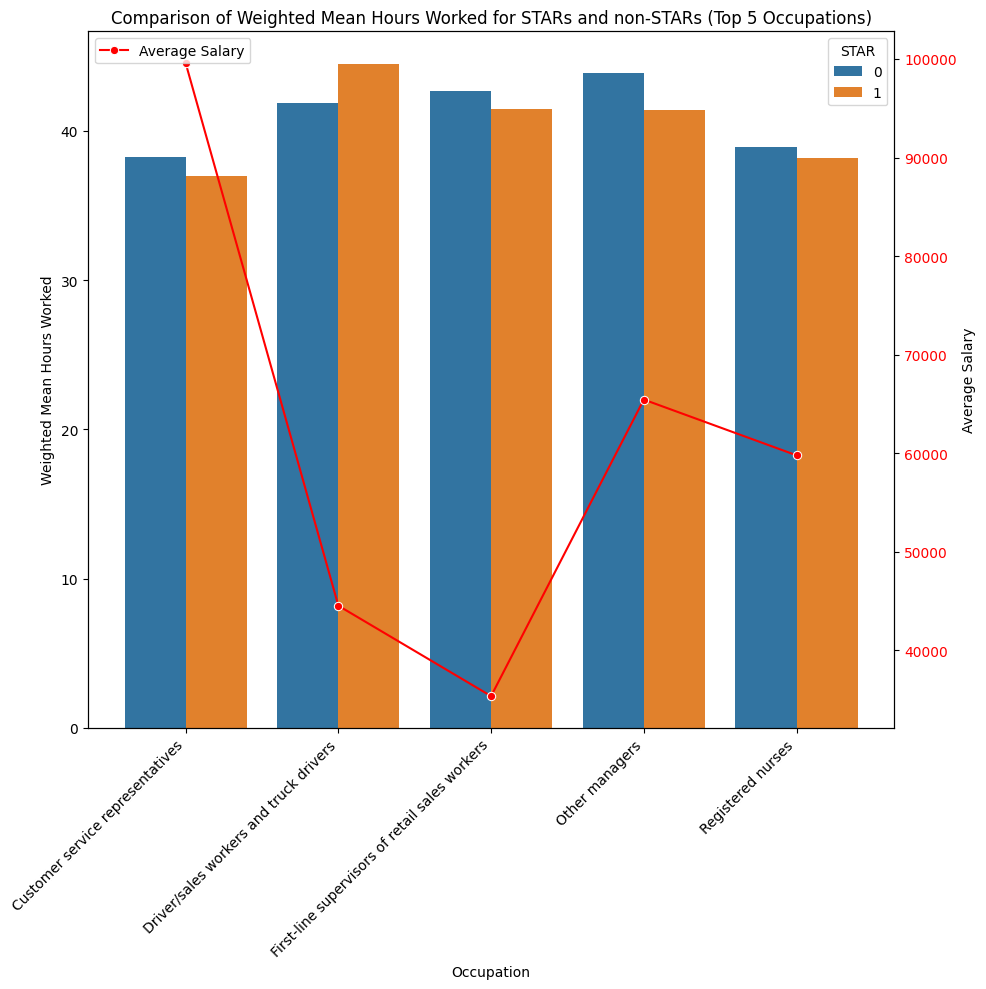

In [164]:
#plot the hours worked for STARs and nonSTARs with the average salary for workers in each occupation

top_5 = ranked_occupations.head(5)

# Calculate the weighted mean hours worked for STARs and non-STARs for the top 5 occupations
weighted_hours = df[df['occ_label'].isin(top_5['occ_label'])].groupby(['occ_label', 'STAR']).apply(
    lambda x: (x['uhrswork'] * x['perwt']).sum() / x['perwt'].sum()
).reset_index(name='weighted_uhrswork')

# Plotting
fig, ax1 = plt.subplots(figsize=(10,10))

# Bar plot for weighted mean hours worked using Seaborn
sns.barplot(data=weighted_hours, x='occ_label', y='weighted_uhrswork', hue='STAR', ax=ax1)
ax1.set_xlabel('Occupation')
ax1.set_ylabel('Weighted Mean Hours Worked')
ax1.set_title('Comparison of Weighted Mean Hours Worked for STARs and non-STARs (Top 5 Occupations)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Creating a second y-axis for average wages
ax2 = ax1.twinx()
sns.lineplot(data=top_5, x=range(len(top_5)), y='avg_wages', marker='o', color='red', ax=ax2, label='Average Salary')
ax2.set_ylabel('Average Salary')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

<ipython-input-166-0c652b1fb351>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


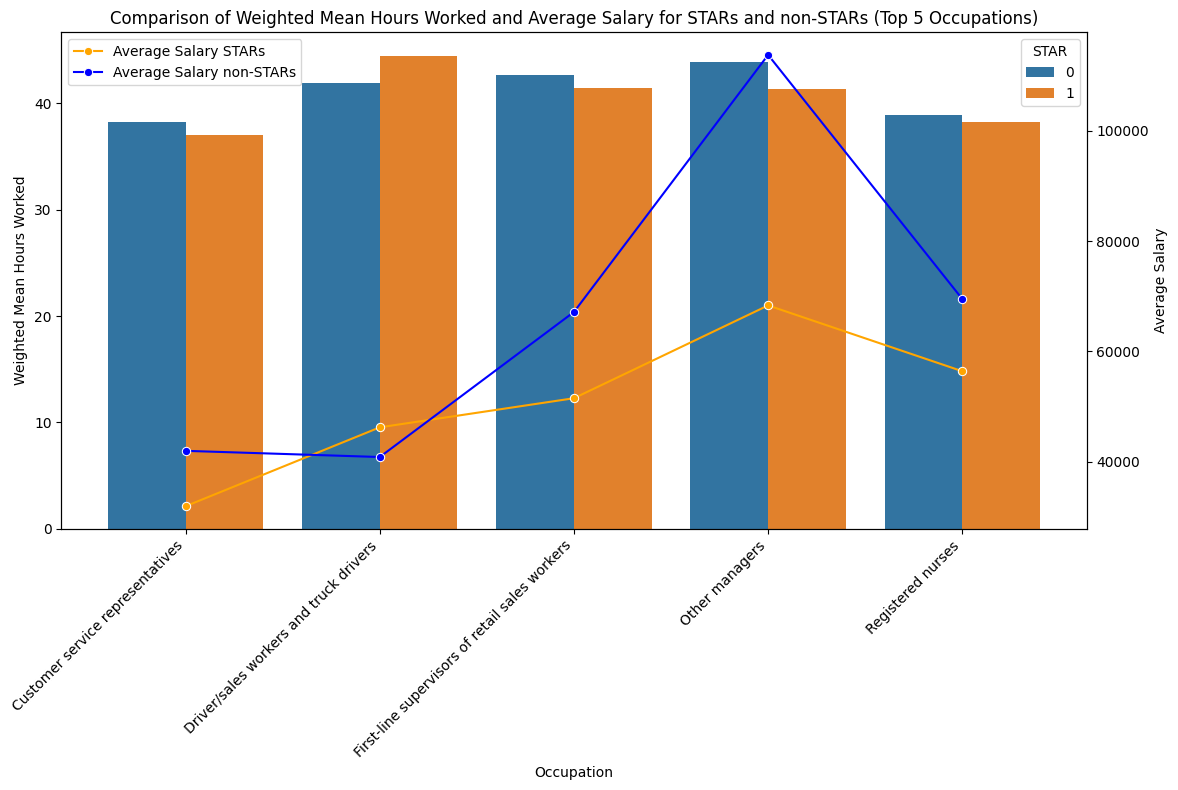

In [166]:
# Break down salary for STARs and nonSTARs and replot

# Calculate the weighted mean hours worked for STARs and non-STARs for the top 5 occupations
weighted_hours = df[df['occ_label'].isin(top_5['occ_label'])].groupby(['occ_label', 'STAR']).apply(
    lambda x: (x['uhrswork'] * x['perwt']).sum() / x['perwt'].sum()
).reset_index(name='weighted_uhrswork')

# Calculate average wages for STARs and non-STARs for the top 5 occupations
avg_wages = df[df['occ_label'].isin(top_5['occ_label'])].groupby(['occ_label', 'STAR']).apply(
    lambda x: (x['incearn'] * x['perwt']).sum() / x['perwt'].sum()
).reset_index(name='avg_wages')

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for weighted mean hours worked using Seaborn
sns.barplot(data=weighted_hours, x='occ_label', y='weighted_uhrswork', hue='STAR', ax=ax1)
ax1.set_xlabel('Occupation')
ax1.set_ylabel('Weighted Mean Hours Worked')
ax1.set_title('Comparison of Weighted Mean Hours Worked and Average Salary for STARs and non-STARs (Top 5 Occupations)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Creating a second y-axis for average wages
ax2 = ax1.twinx()

# Line plot for average salary of STARs
sns.lineplot(data=avg_wages[avg_wages['STAR'] == 1], x='occ_label', y='avg_wages', marker='o', color='Orange', ax=ax2, label='Average Salary STARs')

# Line plot for average salary of non-STARs
sns.lineplot(data=avg_wages[avg_wages['STAR'] == 0], x='occ_label', y='avg_wages', marker='o', color='blue', ax=ax2, label='Average Salary non-STARs')

ax2.set_ylabel('Average Salary')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [168]:
# Statistically compare the salary of STARs for each of the top 5 occupations to the salary of nonSTARs
#alternative hypothesis: nonSTARs average wage is higher than STARs for each occupation
#p<0.05 indicates that nonSTARs have a higher wage in that opccupation

top_5_occupations = ranked_occupations['occ_label'].head(5)

# Conducting one-tailed t-tests for each of the top 5 occupations
one_tailed_t_test_results = {}

for occupation in top_5_occupations:
    star_salaries = df[(df['occ_label'] == occupation) & (df['STAR'] == 1)]['incearn']
    non_star_salaries = df[(df['occ_label'] == occupation) & (df['STAR'] == 0)]['incearn']

    # Conduct a t-test
    t_stat, p_value = stats.ttest_ind(non_star_salaries, star_salaries, equal_var=False)  # Welch's t-test

    # Adjust p-value for one-tailed test
    one_tailed_p_value = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)

    one_tailed_t_test_results[occupation] = {'t_stat': t_stat, 'p_value': one_tailed_p_value}

# Display the one-tailed t-test results
for occupation, results in one_tailed_t_test_results.items():
    print(f"Occupation: {occupation}")
    print(f"t-statistic: {results['t_stat']:.2f}, one-tailed p-value: {results['p_value']:.4f}\n")

Occupation: Other managers
t-statistic: 12.32, one-tailed p-value: 0.0000

Occupation: Driver/sales workers and truck drivers
t-statistic: -2.07, one-tailed p-value: 0.9805

Occupation: Customer service representatives
t-statistic: 4.82, one-tailed p-value: 0.0000

Occupation: Registered nurses
t-statistic: 6.51, one-tailed p-value: 0.0000

Occupation: First-line supervisors of retail sales workers
t-statistic: 4.33, one-tailed p-value: 0.0000



In [169]:
# Statistically compare the salary of STARs for each of the top 5 occupations to the salary of nonSTARs (TWO TAILED)
#alternative hypothesis: nonSTARs average wage is difference from STARs average wage in each occupation
#p<0.05 indicates that nonSTARs and STARs make different wages


# Selecting top 5 occupations
top_5_occupations = ranked_occupations['occ_label'].head(5)

# Conducting t-tests for each of the top 5 occupations
t_test_results = {}

for occupation in top_5_occupations:
    star_salaries = df[(df['occ_label'] == occupation) & (df['STAR'] == 1)]['incearn']
    non_star_salaries = df[(df['occ_label'] == occupation) & (df['STAR'] == 0)]['incearn']

    t_stat, p_value = stats.ttest_ind(star_salaries, non_star_salaries, equal_var=False)  # Welch's t-test
    t_test_results[occupation] = {'t_stat': t_stat, 'p_value': p_value}

# Display the t-test results
for occupation, results in t_test_results.items():
    print(f"Occupation: {occupation}")
    print(f"t-statistic: {results['t_stat']:.2f}, p-value: {results['p_value']:.4f}\n")

Occupation: Other managers
t-statistic: -12.32, p-value: 0.0000

Occupation: Driver/sales workers and truck drivers
t-statistic: 2.07, p-value: 0.0389

Occupation: Customer service representatives
t-statistic: -4.82, p-value: 0.0000

Occupation: Registered nurses
t-statistic: -6.51, p-value: 0.0000

Occupation: First-line supervisors of retail sales workers
t-statistic: -4.33, p-value: 0.0000



##Do STARs and nonSTARs vary in employment status?

In [170]:
# Calculate weighted counts of STARs and non-STARs employed and unemployed
weighted_STARs_employed = df[df['STAR'] == 1].groupby('empstat')['perwt'].apply(lambda x: (x * 1000).sum())
weighted_STARs_unemployed = df[(df['STAR'] == 1) & (df['empstat'] == 2)].groupby('empstat')['perwt'].apply(lambda x: (x * 1000).sum())

weighted_nonSTARs_employed = df[df['STAR'] == 0].groupby('empstat')['perwt'].apply(lambda x: (x * 1000).sum())
weighted_nonSTARs_unemployed = df[(df['STAR'] == 0) & (df['empstat'] == 2)].groupby('empstat')['perwt'].apply(lambda x: (x * 1000).sum())

# Display the results
print("Weighted counts:")
print(f"STARs employed: {weighted_STARs_employed.get(1, 0)}")
print(f"STARs unemployed: {weighted_STARs_unemployed.get(2, 0)}")
print(f"Non-STARs employed: {weighted_nonSTARs_employed.get(1, 0)}")
print(f"Non-STARs unemployed: {weighted_nonSTARs_unemployed.get(2, 0)}")

Weighted counts:
STARs employed: 4869244.005766801
STARs unemployed: 261505.000492
Non-STARs employed: 4022168.004082
Non-STARs unemployed: 163360.0000759


In [171]:
# Calculate the percentage difference
percent_diff = ((weighted_STARs_unemployed.get(2, 0) - weighted_nonSTARs_unemployed.get(2, 0)) / weighted_STARs_unemployed.get(2, 0)) * 100

# Print the percentage difference
print(f"Percentage difference between unemployed STARs and non-STARs: {percent_diff:.2f}% more unemployed STARs")

Percentage difference between unemployed STARs and non-STARs: 37.53% more unemployed STARs
